<a href="https://colab.research.google.com/github/akhavan12/discrete_covid_model/blob/master/Discrete_ver_06_Debug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999

![alt text](https://raw.githubusercontent.com/akhavan12/discrete_covid_model/master/Model_Discrete_v4_new.svg)


In [0]:
## Precision for the calculations
prc = 2

def set_probs_Other_Exposed(Probs):
  ### Other_Exp,Other_Symp
  Probs["Other_Exposed"] = [
          [1.00,0.00], #0
          [0.80,0.20], #1
          [0.60,0.40], #2
          [0.30,0.70], #3
          [0.00,1.00], #4
  ]
def set_probs_Symp(Probs):
  ### Other_Symp,Susceptible   
  Probs['Symp'] =[[1.00,  0.00 ],
                  [0.50,  .50 ], 
                  [0.00,  1.00]]      

def set_probs_M(Probs):
  ### M,R,Severe
  Probs["M"] = [
          [1.00,0.00,0.00], #0
          [0.80,0.00,0.20], #1
          [0.60,0.00,0.40], #2
          [0.50,0.10,0.40], #3
          [0.40,0.40,0.20], #4
          [0.30,0.30,0.40], #5
          [0.30,0.50,0.20], #6
          [0.30,0.50,0.20], #7
          [0.30,0.50,0.20], #8
          [0.30,0.50,0.20], #9
          [0.30,0.50,0.20], #10 
          [0.30,0.50,0.20], #11
          [0.20,0.60,0.20], #12 
          [0.00,0.50,0.50] #13
  ]
def set_probs_MU(Probs):
  ### MU,R,M
  Probs["M_undiagnosed"] = [
          [1.00,0.00,0.00], #0
          [0.80,0.00,0.20], #1
          [0.60,0.00,0.40], #2
          [0.50,0.10,0.40], #3
          [0.40,0.40,0.20], #4
          [0.30,0.30,0.40], #5
          [0.30,0.20,0.50], #6
          [0.30,0.20,0.50], #7
          [0.30,0.20,0.50], #8
          [0.30,0.20,0.50], #9
          [0.30,0.20,0.50], #10 
          [0.30,0.20,0.50], #11
          [0.30,0.20,0.50], #12 
          [0.00,0.50,0.50]  #13
  ]

def set_probs_Severe(Probs):
  ### Severe,R,V,D
  Probs["Severe"] = [
          [0.70,0.20,0.10,0.00], #0
          [0.70,0.20,0.10,0.00], #1
          [0.70,0.20,0.10,0.00], #2
          [0.40,0.20,0.30,0.10], #3
          [0.40,0.20,0.30,0.10], #4
          [0.40,0.20,0.30,0.10], #5
          [0.40,0.20,0.30,0.10], #6
          [0.40,0.20,0.30,0.10], #7
          [0.40,0.20,0.30,0.10], #8
          [0.40,0.20,0.30,0.10], #9
          [0.40,0.20,0.30,0.10], #10
          [0.40,0.20,0.30,0.10], #11
          [0.40,0.20,0.30,0.10], #12
          [0.00,0.00,1.00,0.00]  #13
        ]

def set_probs_ventilator(Probs):
  ### V,R,D 
  Probs["ventilator"] = [
          [0.50,0.45,0.05], #0
          [0.40,0.55,0.05], #1
          [0.40,0.55,0.05], #2
          [0.30,0.65,0.05], #3
          [0.40,0.20,0.30], #6
          [0.40,0.20,0.30], #7
          [0.40,0.20,0.30], #8
          [0.40,0.20,0.30], #9
          [0.40,0.20,0.30], #10
          [0.40,0.20,0.30], #11
          [0.40,0.20,0.30], #12
          [0.00,0.00,1.00]  #13
          ] 

def set_probs_Symp(Probs):
  ### Symp,M   0: not tested, 1: tested positive ,2: tested negative
  Probs['Symp'] =[[0.20,  .80 ], #0 Testing and + cases go to Mild cases , negative cases go back to Healthy
                  [0.00,  1.00]]      #1 ###  all remainings go to Mild cases 

def set_probs_E(Probs):
  ### E,Symp
  Probs["E"] = [[1.00,0.00], #0 ### first day of exposure
                [0.50,0.50], #1       
                [0.40,0.60], #2 
                [0.30,0.70], #4
                [0.20,0.80], #5
                [0.10,0.90], #6
                [0.05,0.95], #7
                [0.05,0.95], #8
                [0.05,0.95], #9
                [0.05,0.95], #10
                [0.05,0.95], #11
                [0.05,0.95], #12
                [0.05,0.95], #13
                [0.05,0.95], #14
                [0.05,0.95], #15
                [0.05,0.95], #16
                [0.05,0.95], #17
                [0.05,0.95], #18
                [0.05,0.95], #19
                [0.00,1.00]  #20
                ]

P={}
set_probs_Severe(P)
set_probs_ventilator(P)
set_probs_Symp(P)
set_probs_E(P)
set_probs_M(P)
set_probs_MU(P)

initial_population = 10000


E = np.zeros((len(P['E']),lenght_t))
Symp = np.zeros((len(P['Symp']),lenght_t))
M = np.zeros((len(P['M']),lenght_t))
MU = np.zeros((len(P['M_undiagnosed']),lenght_t))
W = np.zeros((len(P['Severe']),lenght_t))
V = np.zeros((len(P['ventilator']),lenght_t))
R = np.zeros(lenght_t)
D = np.zeros(lenght_t)
add_M = []
add_sym = []
add_E = []
add_Severe = []
add_ventilator = []
############################################################
############################################################
############################################################

lenght_t = 70
Beta = .0002
E[0,0] = 10
M[0,0] = 0

############################################################
############################################################
############################################################

H = np.zeros(lenght_t)
H[0] = initial_population - E[0,0]

for t in range(lenght_t-1):
  R[t+1] = R[t]
  D[t+1] = D[t]
  
  for state in range(len(P['E'])):
    try:
      E[state+1,t+1] =  np.round(E[state,t] * P["E"][state][0],prc) ## Stay exposed conditions
    except:
      pass
    Symp[0,t+1] = np.round(Symp[0,t+1] + E[state,t] * P["E"][state][1],prc)  ## at time t+1 add the portion of the Exposed to the symptomatic
 

  ### Symptomatic states Tests take place here
  #################################################                            0      1 
  Symp[1,t+1] = np.round(Symp[0,t] * P["Symp"][0][0],prc)         ### P["Symp"][0][0] ==> [[0,1]  [0,1]]
                                                    ###                      |   |   |  |   
                                                    ###         next day    Symp M
                                                    ###         next day             Symp M
  ### from Symptomatic to mild --> where testing also happens
  M[0,t+1] = np.round(Symp[0,t] * P["Symp"][0][1],prc)                 ### From state 0 to Mild state 0
  M[0,t+1] = np.round(M[0,t+1] +  Symp[1,t] * P["Symp"][1][1],prc)     ### From state 1 to Mild state 0

  #################################################
  #add_sym.append(Symp[0,t] - (Symp[0,t] * P["Symp"][0][0]+Symp[0,t] * P["Symp"][0][1]))
  #add_sym.append(Symp[1,t] -  Symp[1,t] * P["Symp"][1][1] )
  
  ### Mild cases are calculated in this section
  for state in range(0,len(P['M'])):
    ### M,R,Severe
    try:
      M[state+1,t+1] =  np.round(M[state,t] * P["M"][state][0],prc) ## from state= state --> to state+1
    except:
      pass
    R[t+1] = np.round(R[t+1] + M[state,t] * P["M"][state][1],prc) ## from Mild to recovered
    W[0,t+1] = np.round(W[0,t+1] + M[state,t] * P["M"][state][2],prc)
    

  ###############################################
  ### Mild Un-diagnosed
  for state in range(0,len(P['M_undiagnosed'])):
    ### M,R,Severe
    try:
      MU[state+1,t+1] =  np.round(MU[state,t] * P["M_undiagnosed"][state][0],prc) ## from state= state --> to state+1
    except:
      pass
    R[t+1] = np.round(R[t+1] + MU[state,t] * P["M_undiagnosed"][state][1],prc) ## from undiagnosed_Mild to recovered

  ##########################################
  ### Severe Cases 

  for state in range(0,len(P['Severe'])):
  ### Severe,R,V,D
    try:
      W[state+1,t+1] =  np.round(W[state,t] * P["Severe"][state][0],prc)
    except:
      pass
    R[t+1] = np.round(R[t+1] + W[state,t] * P["Severe"][state][1],prc)
    V[0,t+1] = np.round(W[state,t] * P["Severe"][state][2],prc)
    D[t+1] = np.round(D[t+1] + W[state,t] * P["Severe"][state][3],prc)


  ###########################################
  ### ventilator cases
  
  for state in range(0,len(P['ventilator'])):
  ### V,R,D 
    try: 
      V[state+1,t+1] = np.round( V[state,t] * P["ventilator"][state][0],prc)
    except:
      pass
    R[t+1] = R[t+1] + np.round(V[state,t] * P["ventilator"][state][1],prc)
    D[t+1] = D[t+1] + np.round(V[state,t] * P["ventilator"][state][2],prc)
    


  if H[t]>H[t] *  M[:,t].sum() * Beta:
    E[0,t+1] = H[t] *  M[:,t].sum() * Beta
    H[t+1]= H[t] - np.round(E[0,t+1])
  elif (H[t]>0) & (H[t]<H[t] *  M[:,t].sum() * Beta):
    E[0,t+1] = H[t] 
    H[t+1]= 0

In [458]:
E_    = pd.DataFrame(E.T).astype('int16')
"""E_    = pd.DataFrame(E.T,columns=['E_0','E_1','E_2','E_3','E_4']).astype('int16')
Symp_ = pd.DataFrame(Symp.T,columns=['Symp_0','Symp_1']).astype('int16')
M_    = pd.DataFrame(M.T,columns=['M_0','M_1','M_2','M_3','M_4','M_5','M_6','M_7','M_8','M_9','M_10','M_11','M_12','M_13']).astype('int16')
W_    = pd.DataFrame(W.T,columns=['W_0','W_1','W_2','W_3','W_4','W_5','W_6','W_7','W_8','W_9','W_10','W_11','W_12','W_13']).astype('int16')
#V_    = pd.DataFrame(V.T,columns=['V_0','V_1','V_2','V_3','V_4','V_5','V_6','V_7','V_8','V_9','V_10','V_11','V_12','V_13'])
H_    = pd.DataFrame(H,columns=['H']).astype('int16')
R_    = pd.DataFrame(R,columns=['R']).astype('int16')
D_    = pd.DataFrame(D,columns=['D']).astype('int16')
"""

"E_    = pd.DataFrame(E.T,columns=['E_0','E_1','E_2','E_3','E_4']).astype('int16')\nSymp_ = pd.DataFrame(Symp.T,columns=['Symp_0','Symp_1']).astype('int16')\nM_    = pd.DataFrame(M.T,columns=['M_0','M_1','M_2','M_3','M_4','M_5','M_6','M_7','M_8','M_9','M_10','M_11','M_12','M_13']).astype('int16')\nW_    = pd.DataFrame(W.T,columns=['W_0','W_1','W_2','W_3','W_4','W_5','W_6','W_7','W_8','W_9','W_10','W_11','W_12','W_13']).astype('int16')\n#V_    = pd.DataFrame(V.T,columns=['V_0','V_1','V_2','V_3','V_4','V_5','V_6','V_7','V_8','V_9','V_10','V_11','V_12','V_13'])\nH_    = pd.DataFrame(H,columns=['H']).astype('int16')\nR_    = pd.DataFrame(R,columns=['R']).astype('int16')\nD_    = pd.DataFrame(D,columns=['D']).astype('int16')\n"

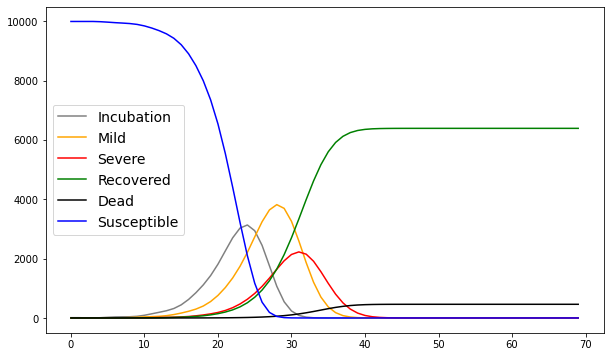

In [459]:
f,ax = plt.subplots(figsize=(10,6))
ax.plot(E.sum(axis=0),color='gray',label = 'Incubation')
ax.plot(M.sum(axis=0),color='orange', label ='Mild')
ax.plot(W.sum(axis=0),color='red', label ='Severe')
ax.plot(R,color='green', label = 'Recovered')
ax.plot(D,color='Black', label = 'Dead')
#ax.plot(R+D,'.-',color='yellow', label = 'NOT')
ax.plot(H,color='blue', label = 'Susceptible')
ax.legend(fontsize=14)

In [467]:
res_2=E_.copy()
res_2['sums_E'] = res_2.sum(axis=1)
res_2['total_extacted_from_population']
res_2.style.background_gradient(cmap='viridis')

In [461]:
res = pd.concat([H_,E_,Symp_,M_,W_,V_,R_,D_],axis=1)
res['sum'] = res.sum(axis=1)
res=res.fillna(0).astype('int32')
res['sum_of_processing']= res[['E_0', 'E_1', 'E_2', 'E_3', 'E_4', 
                               'Symp_0', 'Symp_1', 
                               'M_0', 'M_1', 'M_2', 'M_3', 'M_4',
                               'W_0', 'W_1', 'W_2', 'W_3', 'W_4', 
                               'V_0','V_1', 'V_2', 'V_3', 'V_4']].sum(axis=1)
                  
res.style.background_gradient(cmap='viridis')

KeyError: ignored

In [0]:
#### Storage:
  
#E_    = pd.DataFrame(E.T,columns=['E_0','E_1','E_2','E_3','E_4'])
#Symp_ = pd.DataFrame(Symp.T,columns=['Symp_0','Symp_1'])
#M_    = pd.DataFrame(M.T,columns=['M_0','M_1','M_2','M_3','M_4'])
#W_    = pd.DataFrame(W.T,columns=['W_0','W_1','W_2','W_3','W_4'])
#V_    = pd.DataFrame(V.T,columns=['V_0','V_1','V_2','V_3','V_4'])
#H_    = pd.DataFrame(H,columns=['H'])
#R_    = pd.DataFrame(R,columns=['R'])
#D_    = pd.DataFrame(D,columns=['D'])
#
#res = pd.concat([H_,E_,Symp_,M_,W_,V_,R_,D_],axis=1)
#res['sum'] = res.sum(axis=1)
#res['sum_of_processing']= res[['E_0', 'E_1', 'E_2', 'E_3', 'E_4', 
#                               'Symp_0', 'Symp_1', 
#                               'M_0', 'M_1', 'M_2', 'M_3', 'M_4',
#                               'W_0', 'W_1', 'W_2', 'W_3', 'W_4', 
#                               'V_0','V_1', 'V_2', 'V_3', 'V_4']].sum(axis=1)
#                  
##res.style.background_gradient(cmap='viridis')


#f,ax = plt.subplots(figsize=(10,6))
#ax.plot(res['D'],color='black',label='Dead')
#ax.plot(res[['M_0','M_1','M_2','M_3','M_4']].sum(axis=1),color='orange',label='Mild')
#ax.plot(res[['W_0','W_1','W_2','W_3','W_4']].sum(axis=1),color='gray',label='Severe')
#ax.plot(res[['V_0','V_1','V_2','V_3','V_4']].sum(axis=1),color='red',label='Ventilator')
#ax.plot(res['R'],label='Recovered')
##ax.plot(res['H'])
#ax.legend(fontsize=14)